In [36]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 24 08:28:02 2018
@author: tyler
"""
from pyne import data
from pyne import nucname
import numpy as np
import matplotlib.pyplot as plt
s = data.decay_data_children(922350000)
U235 = nucname.id('U-235')
unk = nucname.name(902310000)
######### Decay chain
U235 = nucname.id('U-235')

IDS = [922350000]
gens = 7
generation = [0]
parent_to_child = []
parent_text = []
j = 0
for i in range(gens):
    iso = IDS[i]
    child = data.decay_data_children(iso)
    nums =len(child)
    if nums ==1:
        IDS.append(child[0])
        j+=1
        generation.append(j)
        parent_to_child.append(str(iso)+'-->'+str(child[0]))
        parent_text.append(str(nucname.name(IDS[i]))+'-->'+str(nucname.name(child[0])))
    if nums ==2:
        IDS.append(child[0])
        parent_to_child.append(str(iso)+'-->'+str(child[0]))
        parent_text.append(str(nucname.name(IDS[i]))+'-->'+str(nucname.name(child[0])))
        IDS.append(child[1])
        parent_to_child.append(str(iso)+'-->'+str(child[1]))
        parent_text.append(str(nucname.name(IDS[i]))+'-->'+str(nucname.name(child[1])))
        j+=1
        generation.append(j)
        generation.append(j)
print('Parent to child relationship:' + str(parent_text))

print(parent_to_child)
print('generations:' + str(generation))
print('list of nucname.ids:'+str(IDS))

Parent to child relationship:['U235-->Th231', 'Th231-->Pa231', 'Pa231-->Ac227', 'Ac227-->Fr223', 'Ac227-->Th227', 'Fr223-->At219', 'Fr223-->Ra223', 'Th227-->Ra223', 'At219-->Bi215']
['922350000-->902310000', '902310000-->912310000', '912310000-->892270000', '892270000-->872230000', '892270000-->902270000', '872230000-->852190000', '872230000-->882230000', '902270000-->882230000', '852190000-->832150000']
generations:[0, 1, 2, 3, 4, 4, 5, 5, 6, 7]
list of nucname.ids:[922350000, 902310000, 912310000, 892270000, 872230000, 902270000, 852190000, 882230000, 882230000, 832150000]


In [37]:
generation
print(data.decay_const(IDS[1]))
print(data.decay_const(IDS[2]))
data.decay_const(IDS[3])
data.decay_const(IDS[4])
data.decay_const(IDS[5])
data.decay_const(IDS[6])


7.544705465864957e-06
6.704672993171589e-13


0.012377628224284737

In [112]:
N_0= 100
F_0 = 0
Q_0 = 0
t = np.linspace(0,100000,1000)
#N = N_0*e^-lambda*t
decay_con= 0.005
decay_con1= 0.0001
decay_con2= 0.000001
Q_end = [0]
for i in t:
    N= N_0*np.exp(-decay_con*t)
    Loss_N = N_0-N
    F = F_0*np.exp(-decay_con1*t) +Loss_N*np.exp(-decay_con1*t)
    Loss_F = abs(N_0-N-F)
    Q = Loss_F    
    

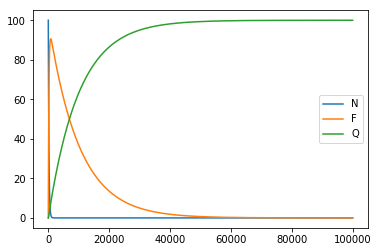

0.00453999297625 99.995460007 100.0


In [113]:
plt.plot(t,N,label ="N")
plt.plot(t,F,label ="F")
plt.plot(t,Q,label ="Q")
plt.legend()
plt.show()
print(F[-1],Q[-1],F[-1]+Q[-1])